# Statistics Journey Part 1 
### In this series of notebooks I want to try to code and use most important concepts in statistics

### 0. Importing libraries

In [1]:
import math
import random
import plotly.express as px
import pandas as pd

/var/folders/1m/mckmrfpx3yn1g1wj1m8cxm000000gn/T/ipykernel_70998/1489024030.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


![Screenshot 2025-02-25 at 21.45.20.png](<attachment:Screenshot 2025-02-25 at 21.45.20.png>)
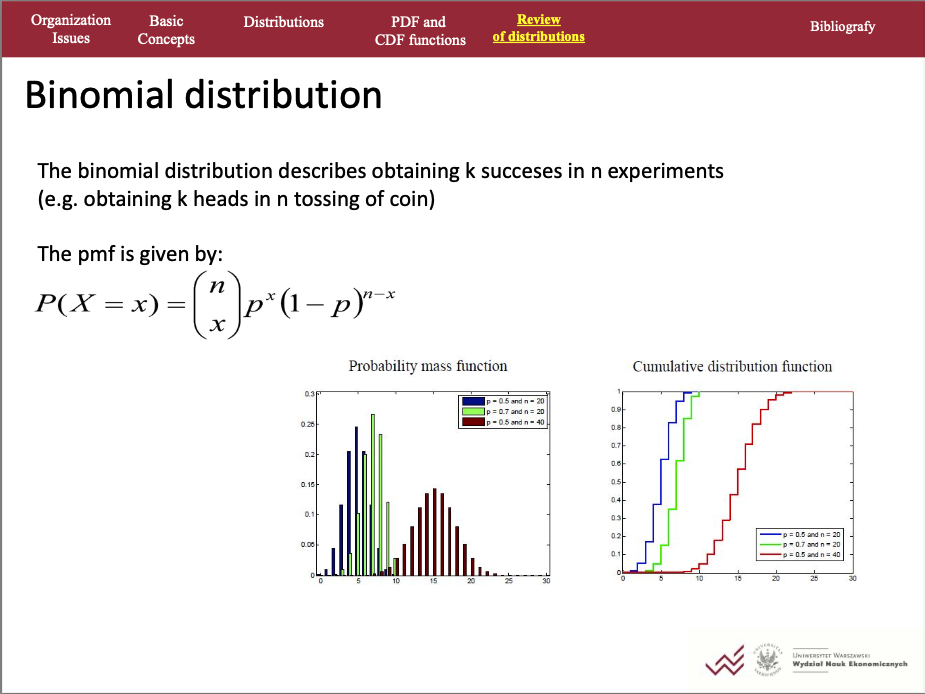

### Exercise 1:
Suppose you roll an unfair die 50 times with the probability of obtaining “6” equal to 0.6 (i.e.
we deal with binomial distribution with n=50 and p=0.6).
- Plot the probability density function for this distribution
- What is the probability of obtaining more than 40 times “6”?

In [2]:
def binomial(k, n, p):
    '''Calculate probability of obtaining k successes in n tries'''
    P = (math.factorial(n)/(math.factorial(k)*math.factorial((n-k))))*p**k*(1-p)**(n-k)
    return P

In [3]:
#Preparing data to create a probability density function 
n = 50 
p = 0.6
probDensity = [binomial(k,n,p) for k in range(n)]
kValues = [k for k in range(n)]
df = pd.DataFrame(list(zip(probDensity, kValues)), columns = ["Probability", "k"])

In [4]:
pdf = px.bar(df, x = "k", y = "Probability") 
pdf.show()

What is the probability of obtaining more than 40 times “6”?

In [5]:
cumulativeProbability = 0
for k in range(41):
    cumulativeProbability += binomial(k,n,p)

1-cumulativeProbability

0.0007572965829100164

### Exercise 2:
Use data on consumers’ satisfaction and age from the file „pizza.csv”.
- Create the pdf and cdf fuctions for variables satisfaction and age. 
- What is the probabiliy that the consumers are younger than 40?
- What is the share of the consumers that are younger than 40?

In [6]:
df = pd.read_csv("/Users/konradwronski/Desktop/Projects/Grind/DataScienceJungle/EDA/Pizza.csv")


Satisfaction PMF & CDF

In [7]:
CountSatisfaction = df["Satisfaction"].value_counts().rename_axis('Satisfaction').reset_index(name= "Counts")

In [8]:
def cumulativeDensityProbability(column, lista = [], suma = 0):
    '''Creates a column with cumulative probability'''
    for k in column:
        suma += k 
        lista.append(suma)
    return lista 

Adding Cumulative Probability Column to create CDF

In [9]:
CountSatisfaction["Probability"] = CountSatisfaction["Counts"]/len(df)
CountSatisfaction = CountSatisfaction.sort_values(["Satisfaction"])

cumulativeProbability = []

CountSatisfaction["Cumulative Probability"] = cumulativeDensityProbability(CountSatisfaction["Probability"], cumulativeProbability)

In [10]:
figSatisfaction = px.bar(CountSatisfaction, x="Satisfaction", y = "Probability", title="Probability Mass Function")
figSatisfaction.show()

In [11]:
figCumulativeSatisfaction = px.bar(CountSatisfaction, x = "Satisfaction", y = "Cumulative Probability", title="Cumulative Density Function")
figCumulativeSatisfaction.show()

Age PDF & CDF

Age is a continous numerical column so we have to approach PDF and CDF differently. 

![Screenshot 2025-02-27 at 10.59.28.png](<attachment:Screenshot 2025-02-27 at 10.59.28.png>)
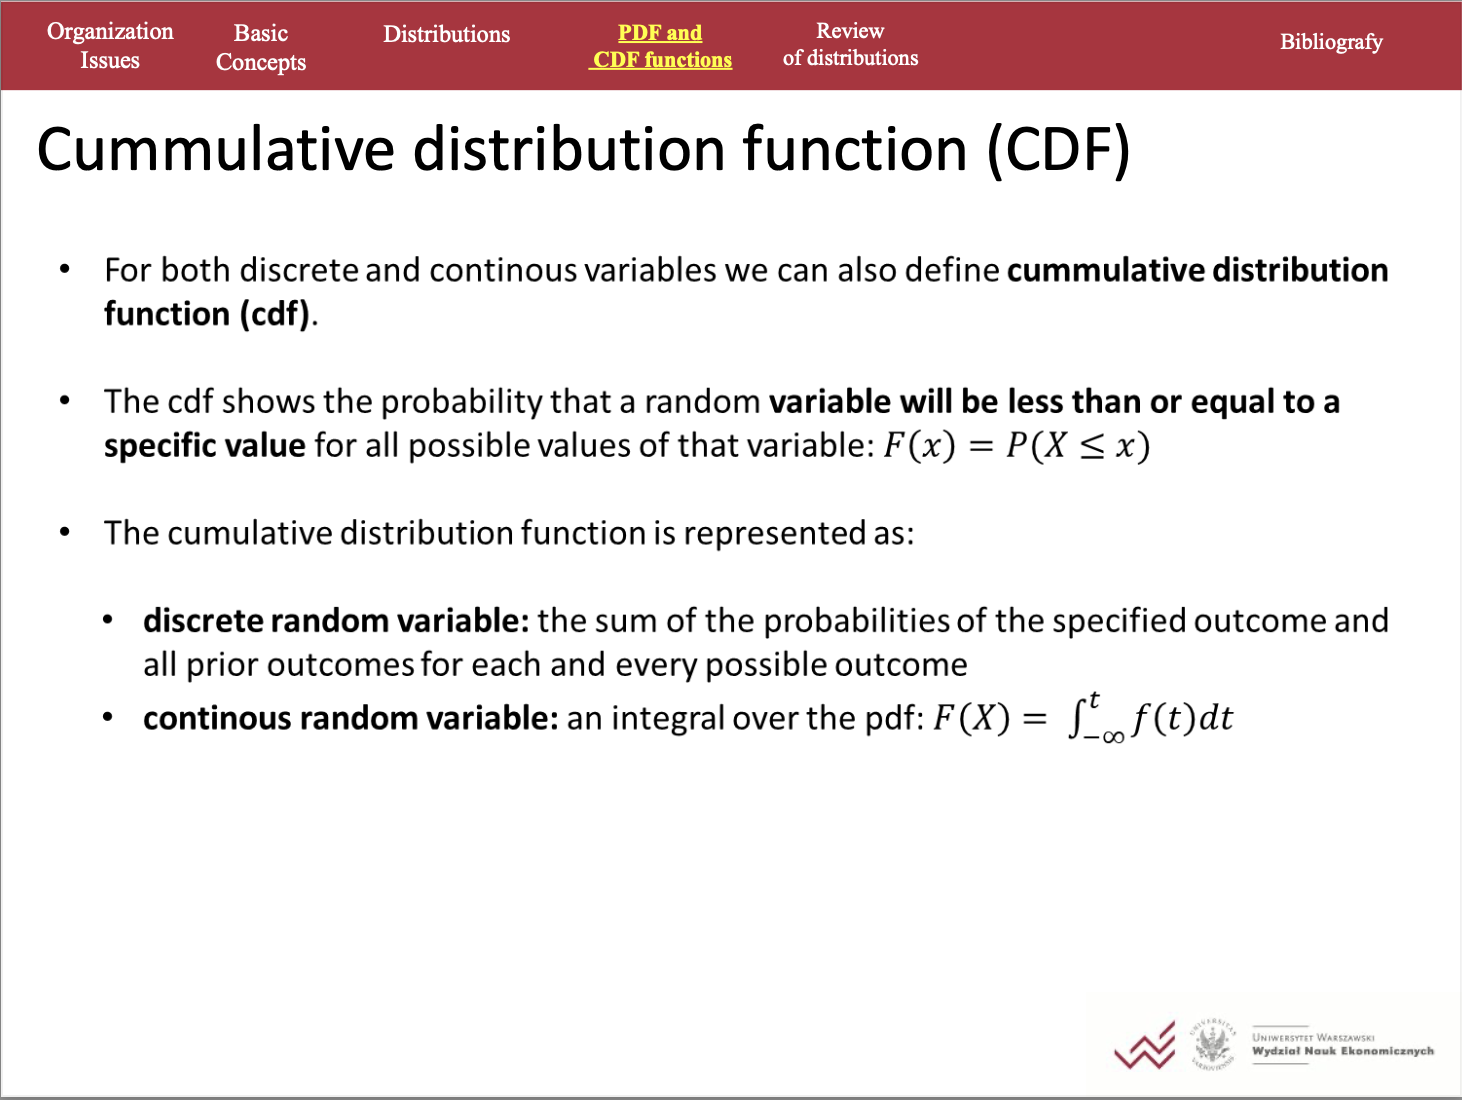

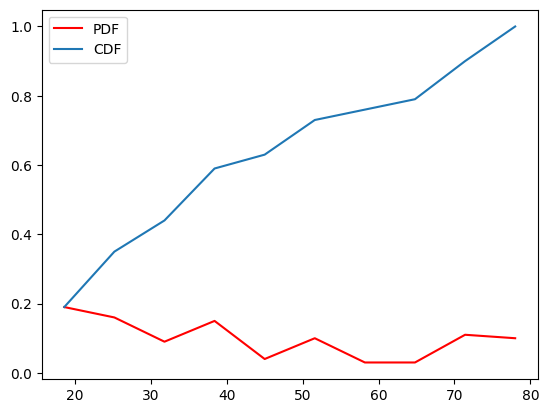

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

count, bins_count = np.histogram(df["Age"], bins=10) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
   
plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.legend() 

### Exercise 3: Binomial distribution
Calculate the probablity of obtaining 0 heads in 4 coin tossing.
We have k=0 successes in 4 trials in which p=1/2

In [15]:
binomial(0, 4 , 0.5)

0.0625

What are the chances of receiving more than 3 heads in 4 coin tossing?

In [23]:
binomial(4, 4 , 0.5)

0.0625

### Exercise 4: Poisson distribution

![Screenshot 2025-02-27 at 11.46.51.png](<attachment:Screenshot 2025-02-27 at 11.46.51.png>)
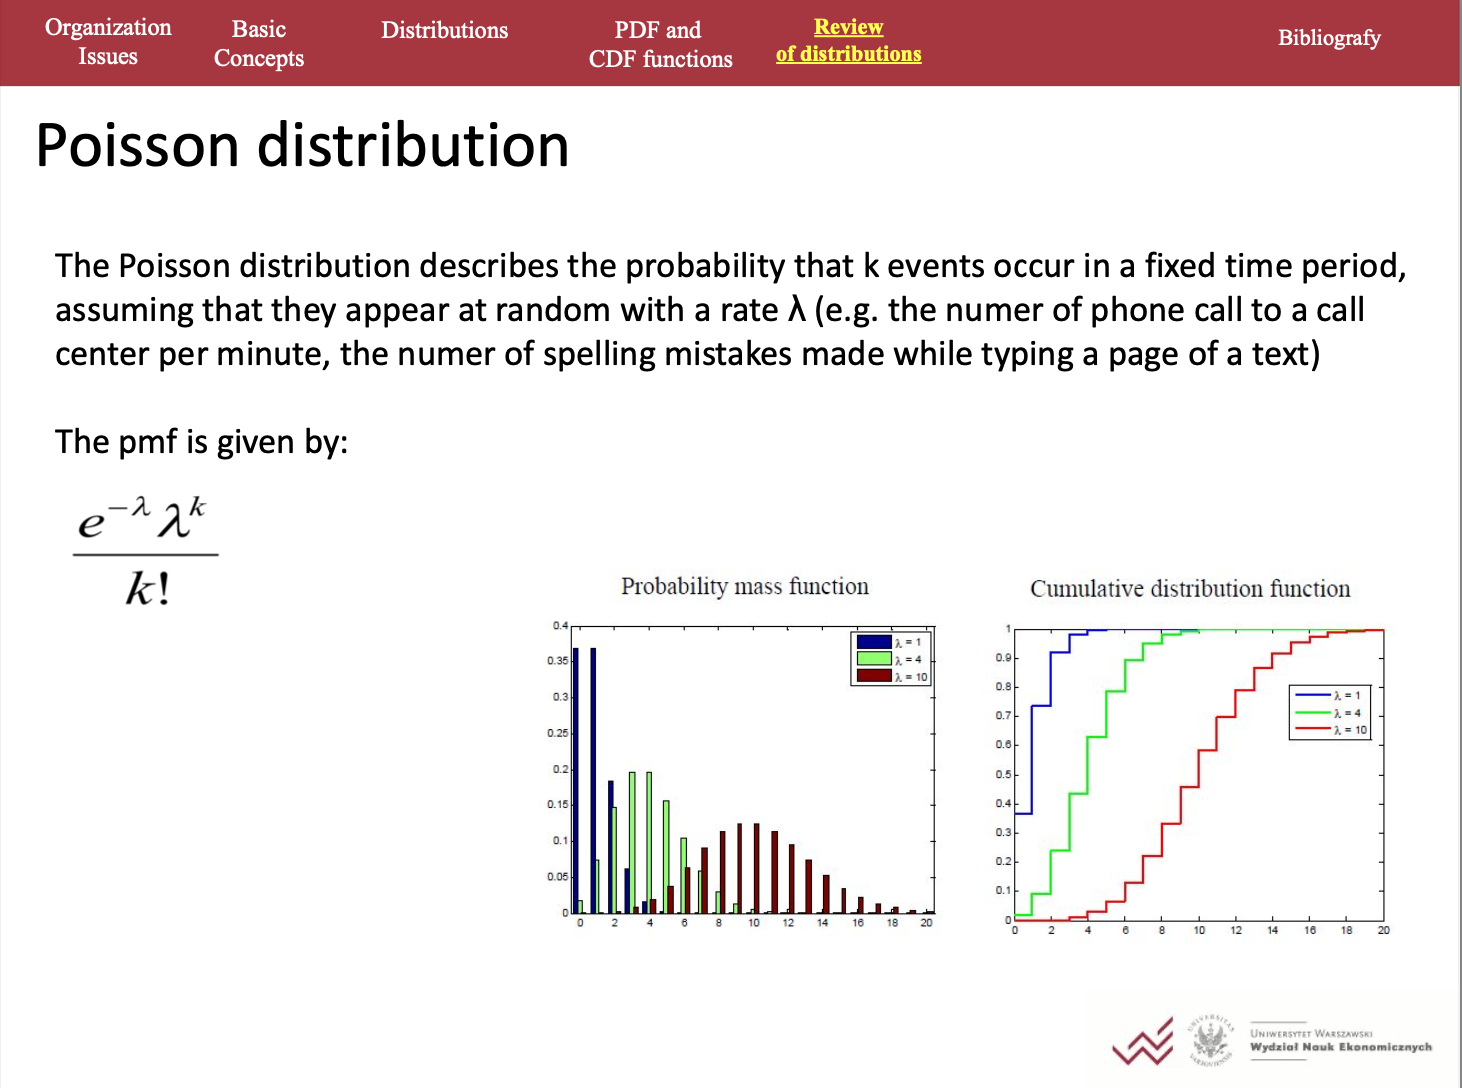

In [24]:
def poisson(k, rate):
    '''Probability that k events occur in a fixed time frame. With a rate lambda'''
    P = (math.e ** (-rate) * rate ** k)/ math.factorial(k)
    return P

Consider a population of raisin buns for which there are an average of
3 raisins per bun, i.e. lambda = 3. The number of raisins in
a particular bun is uncertain; the possible numbers of raisins are 0, 1, 2, . . .
Calculate the probability of finding exactly 2 raisins in a bun. 
What are the chances of finding more than 3 raisins in a bun?

Probability of finding exactly 2 raisins in a bun
We need to calculate the probability that exactly k=2 events occur in a bun, 
when we know that on average there are 3 raisins in a bun (lambda=3)

In [25]:
poisson(2, 3)

0.22404180765538778

Probability of finding more than 3 raisins in the bun
We need to calculate the probability that we find more than 3 raisins, i.e. 4,5,6, .... 

In [26]:
cumProb = 0
for k in range (4):
    cumProb += poisson(k,3)

1 - cumProb

0.35276811121776863

## Continous distributions

### Normal Distribution

![Screenshot 2025-02-27 at 11.55.37.png](<attachment:Screenshot 2025-02-27 at 11.55.37.png>)
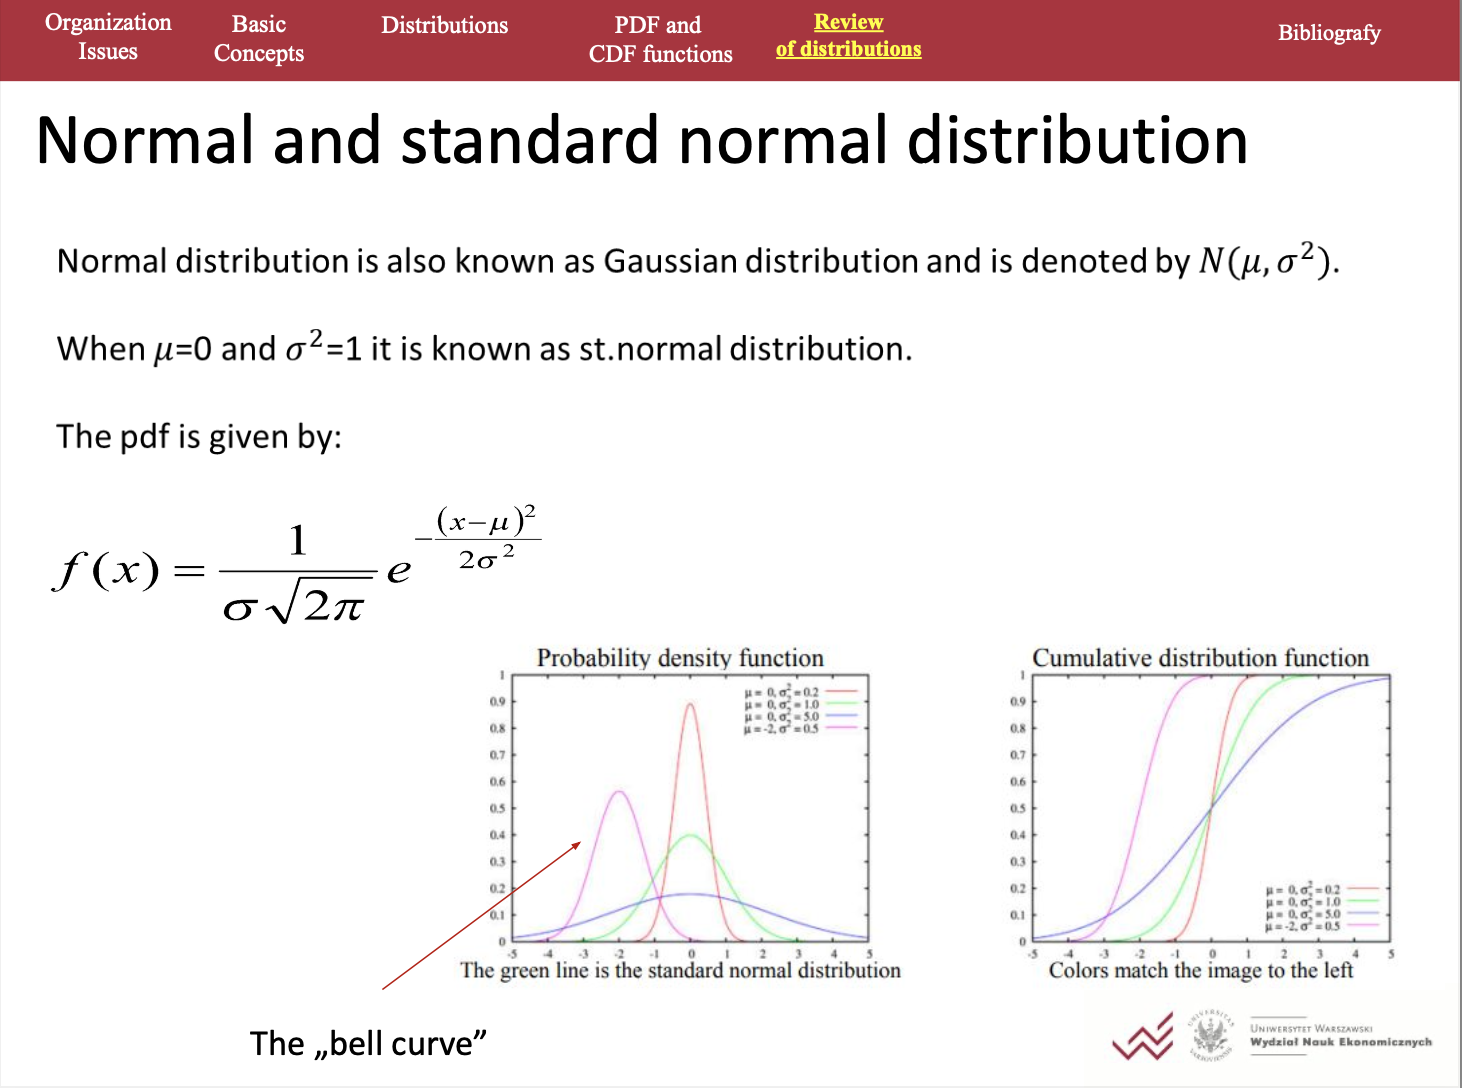

### Exercise 4: Normal distribution
- Consider a farmer who sells apples in wooden boxes.
 - The weights of the boxes vary and are assumed to be normally distributed with miu=15 kg and sigma^2=9/4 kg2. 
The farmer wants to avoid customers being unsatisfied because the boxes are too low in weight. He therefore asks the following question: 
 - What is the probability that a box with a weight of 10 to 15 kg is sold?
 - answer this question by making relevent calculations and by using pdf and cdf graphs.

- We need to calculate the probability that the box weights in between 10-15kg
- We can do that by calculating the probability that a box is less than 15 kg and than it is less than 10 kg and subsrtracting these values
- The probability that a box is less than 15 kg is a cdf at 15

In [37]:
import scipy.stats as stats

# Parameters
mu = 15
sigma = 1.5

# Calculate CDF values
cdf_15 = stats.norm.cdf(15, loc=mu, scale=sigma)
cdf_10 = stats.norm.cdf(10, loc=mu, scale=sigma)

# Probability between 10 and 15
prob = cdf_15 - cdf_10
prob

0.49957093966680316

A study on birds collects information such as the length of their eggs (in mm). Assume that the
length is normally distributed with μ = 42.1mm and σ2 = 20.82
- What is the probability of finding an egg with a length greater than 50 mm?
- What is the probability of finding an egg between 30 and 40 mm in length?
- Generate probability distribution and cumulative distribution functions for this
distribution and show graphically probabilities you calculated in points (a) and (b)

In [38]:
# a
mu = 42
sigma = 20.82

cdf_50 = stats.norm.cdf(50, loc=mu, scale= sigma)

1 - cdf_50

0.3503980942196653

In [40]:
# b
cdf_40 = stats.norm.cdf(40, loc = mu, scale = sigma)

cdf_30 = stats.norm.cdf(30, loc = mu, scale = sigma)

cdf_40 - cdf_30 

0.17955293386963955

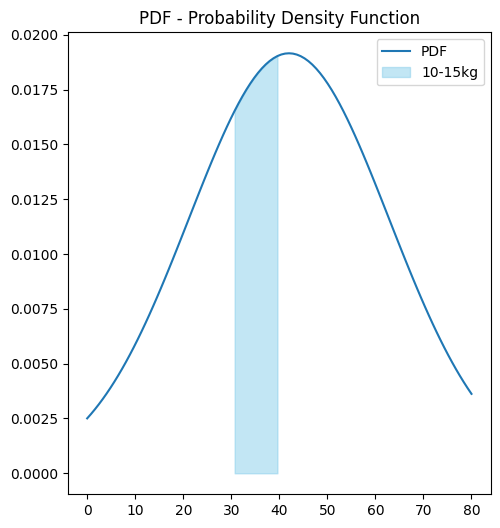

In [43]:
# c
x = np.linspace(0, 80, 100)

pdf = stats.norm.pdf(x, loc = mu, scale = sigma)
cdf = stats.norm.cdf(x, loc = mu, scale = sigma)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label="PDF")
plt.fill_between(x, pdf, where=(x >= 30) & (x <= 40), color='skyblue', alpha=0.5, label="10-15kg")
plt.title("PDF - Probability Density Function")
plt.legend()
